In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [2]:
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [3]:
# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [4]:
# define data preparation (Augmentation)
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)

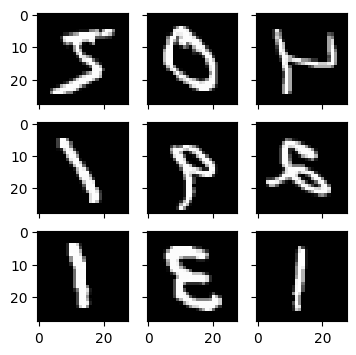

In [5]:
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9, shuffle=False):
    # create a grid of 3x3 images
    fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(4,4))
    for i in range(3):
        for j in range(3):
            ax[i][j].imshow(X_batch[i*3+j].reshape(28,28), cmap=plt.get_cmap("gray"))
    # show the plot
    plt.show()
    break

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [7]:
# Set the data augmentation generator to train the model
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=False,  # Usually, we don't use horizontal flips for digit recognition
    fill_mode='nearest'
)

# Train the model
train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
validation_datagen = ImageDataGenerator(rescale=1./255)  # No augmentation for validation data
validation_generator = validation_datagen.flow(X_test, y_test, batch_size=32)

In [8]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(X_train) // 32,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=len(X_test) // 32
)

Epoch 1/10
1875/1875 [==============================] - 40s 16ms/step - loss: 0.4014 - accuracy: 0.8737 - val_loss: 0.0456 - val_accuracy: 0.9843
Epoch 2/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1585 - accuracy: 0.9526 - val_loss: 0.0334 - val_accuracy: 0.9891
Epoch 3/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.1208 - accuracy: 0.9645 - val_loss: 0.0310 - val_accuracy: 0.9889
Epoch 4/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0996 - accuracy: 0.9707 - val_loss: 0.0253 - val_accuracy: 0.9922
Epoch 5/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0905 - accuracy: 0.9732 - val_loss: 0.0263 - val_accuracy: 0.9915
Epoch 6/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0787 - accuracy: 0.9764 - val_loss: 0.0215 - val_accuracy: 0.9924
Epoch 7/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0720 - accuracy: 0.9790 - val_loss: 0.0215 -

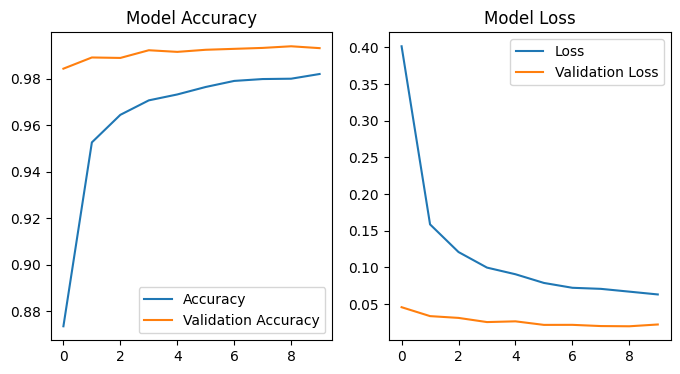

In [9]:
# Optionally plot the training history
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')

plt.show()